In [1]:
! pip install scikit-learn matplotlib pandas numpy seaborn

"pip" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data = pd.get_dummies(data, columns=['cp', 'restecg', 'slope', 'thal', 'ca'])
data

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,slope_2,thal_0,thal_1,thal_2,thal_3,ca_0,ca_1,ca_2,ca_3,ca_4
0,63,1,145,233,1,150,0,2.3,1,False,...,False,False,True,False,False,True,False,False,False,False
1,37,1,130,250,0,187,0,3.5,1,False,...,False,False,False,True,False,True,False,False,False,False
2,41,0,130,204,0,172,0,1.4,1,False,...,True,False,False,True,False,True,False,False,False,False
3,56,1,120,236,0,178,0,0.8,1,False,...,True,False,False,True,False,True,False,False,False,False
4,57,0,120,354,0,163,1,0.6,1,True,...,True,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,True,...,False,False,False,False,True,True,False,False,False,False
299,45,1,110,264,0,132,0,1.2,0,False,...,False,False,False,False,True,True,False,False,False,False
300,68,1,144,193,1,141,0,3.4,0,True,...,False,False,False,False,True,False,False,True,False,False
301,57,1,130,131,0,115,1,1.2,0,True,...,False,False,False,False,True,False,True,False,False,False


In [6]:
from sklearn.model_selection import train_test_split

x = data.drop('target', axis=1)
y = data['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [7]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
x_train[['age', 'trestbps', 'chol', 'thalach']] = standard.fit_transform(x_train[['age', 'trestbps', 'chol', 'thalach']])
x_test[['age', 'trestbps', 'chol', 'thalach']] = standard.transform(x_test[['age', 'trestbps', 'chol', 'thalach']])
x_train

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,slope_2,thal_0,thal_1,thal_2,thal_3,ca_0,ca_1,ca_2,ca_3,ca_4
276,0.356391,1,0.820196,-0.517899,0,-1.881931,0,2.0,True,False,...,False,False,False,False,True,False,True,False,False,False
44,-1.688541,1,0.466778,1.354736,0,1.379976,0,0.0,False,False,...,True,False,False,True,False,True,False,False,False,False
260,1.217414,0,2.705092,-0.336090,1,0.659815,1,1.0,True,False,...,False,False,False,False,True,False,False,True,False,False
74,-1.258029,0,-0.593475,-0.608804,0,0.659815,0,0.2,False,False,...,False,False,False,True,False,True,False,False,False,False
133,-1.473285,1,-1.300311,-0.208823,0,0.151466,0,0.0,False,True,...,True,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,-0.397005,1,-1.889341,-0.445175,0,-0.272159,1,1.2,False,False,...,False,False,False,True,False,True,False,False,False,False
131,-0.612261,0,0.113360,0.445690,0,0.532728,0,0.0,False,True,...,False,False,False,True,False,True,False,False,False,False
265,1.217414,1,-1.182505,-0.626985,0,-0.738145,1,0.1,True,False,...,True,False,False,True,False,False,True,False,False,False
122,-1.473285,0,-1.182505,0.391147,0,0.956352,1,0.0,False,False,...,True,False,False,True,False,True,False,False,False,False


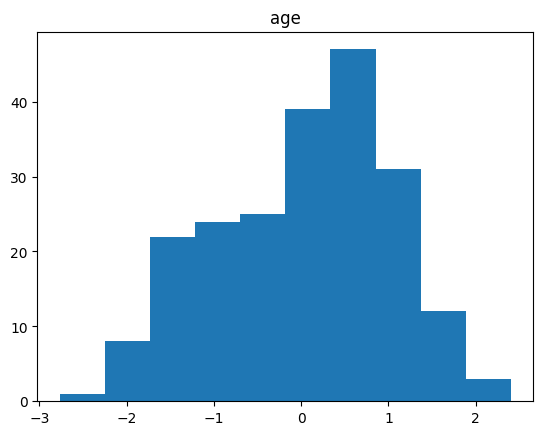

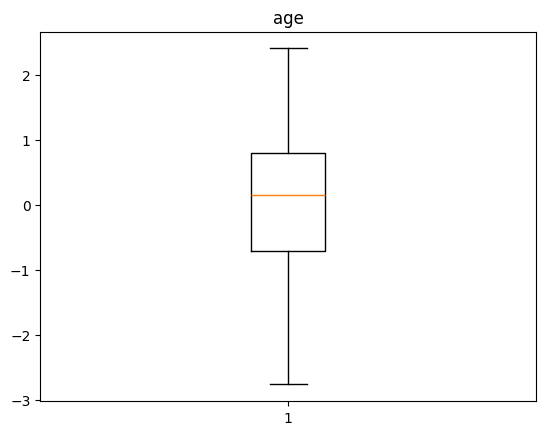

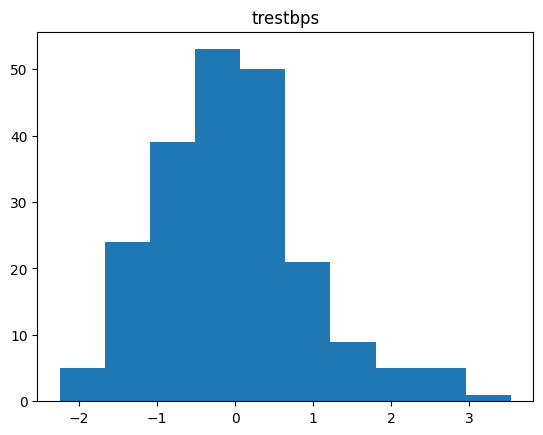

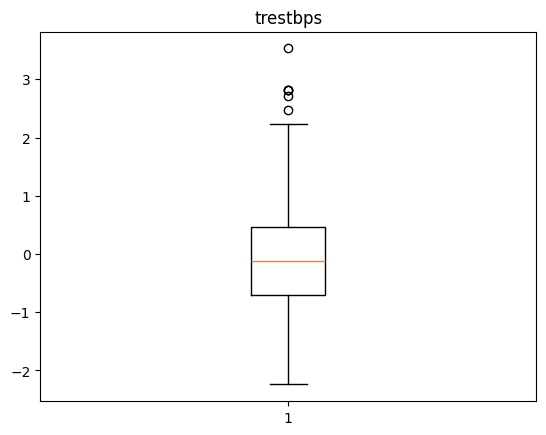

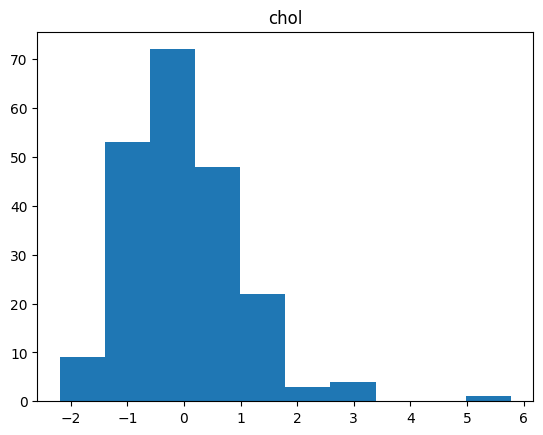

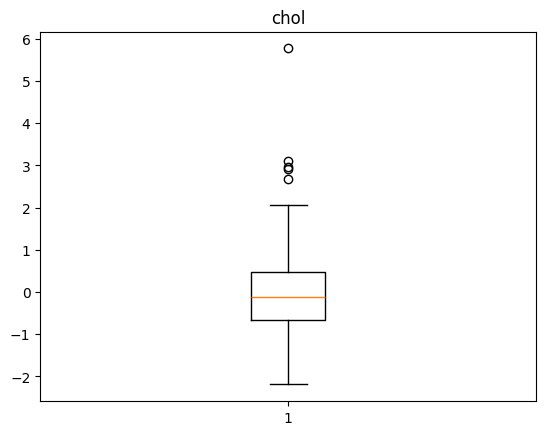

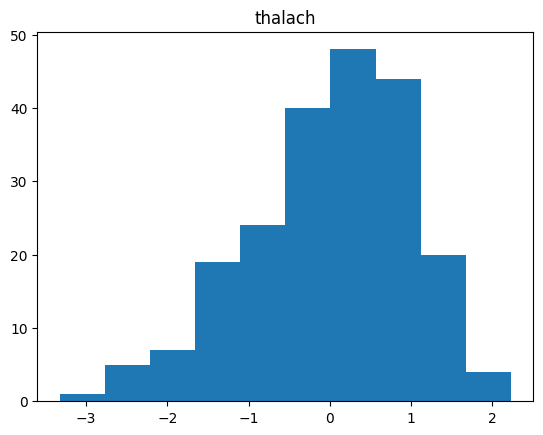

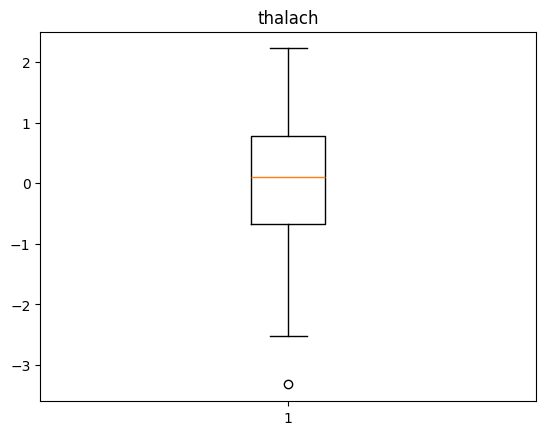

In [8]:
import matplotlib.pyplot as plt

num_variables = ['age', 'trestbps', "chol", "thalach"]
for i in num_variables:
    plt.hist(x_train[i])
    plt.title(i)
    plt.show()
    plt.boxplot(x_train[i])
    plt.title(i)
    plt.show()

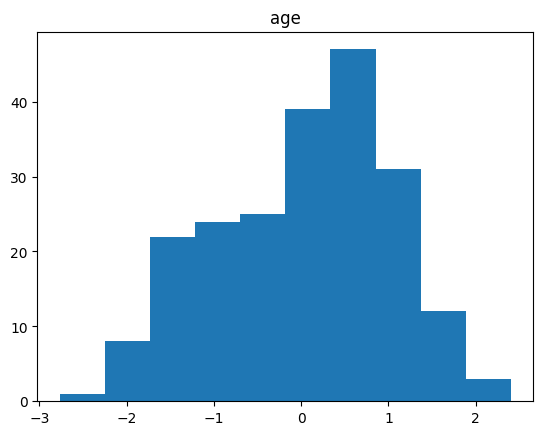

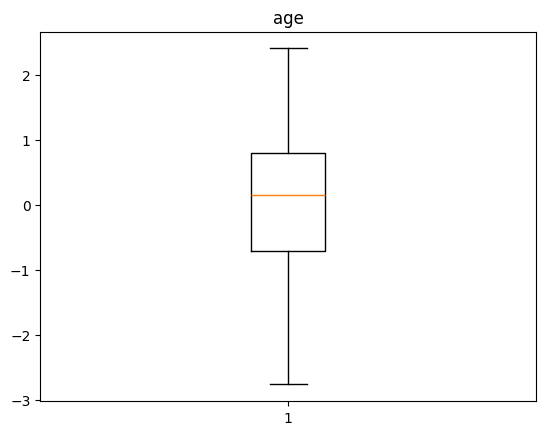

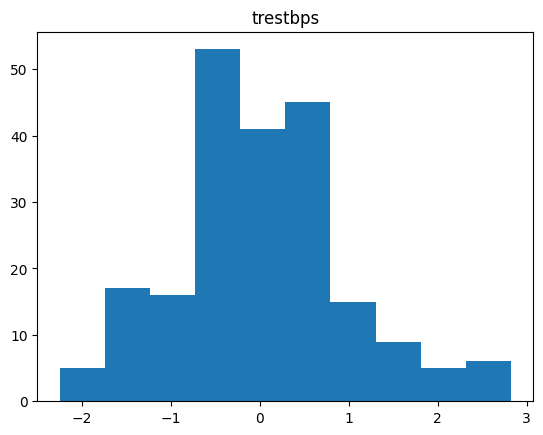

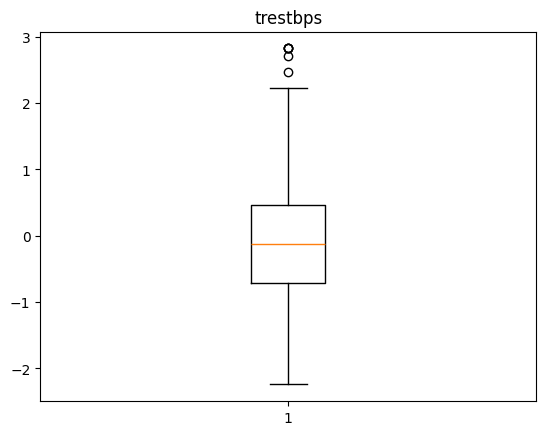

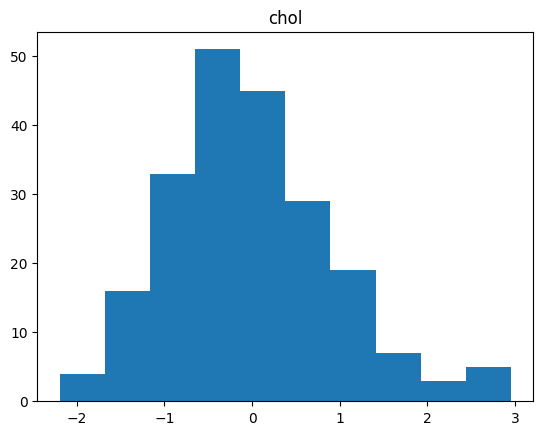

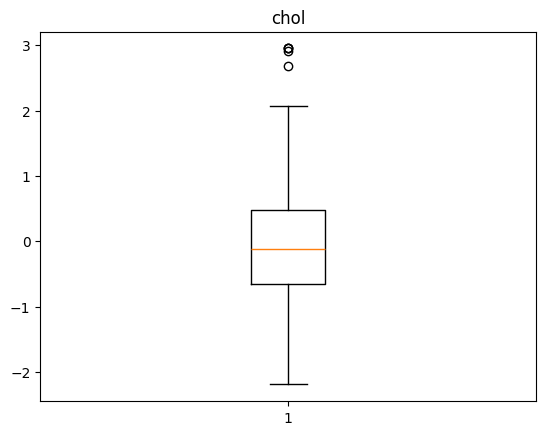

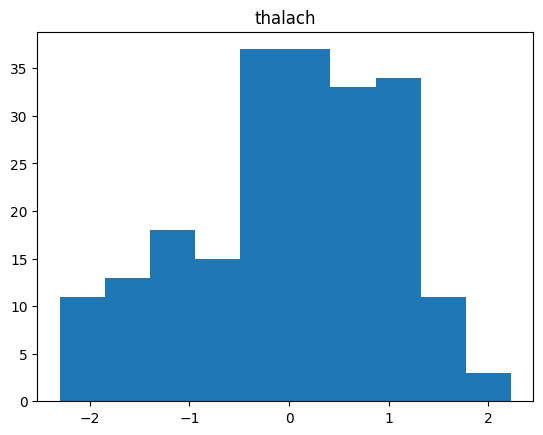

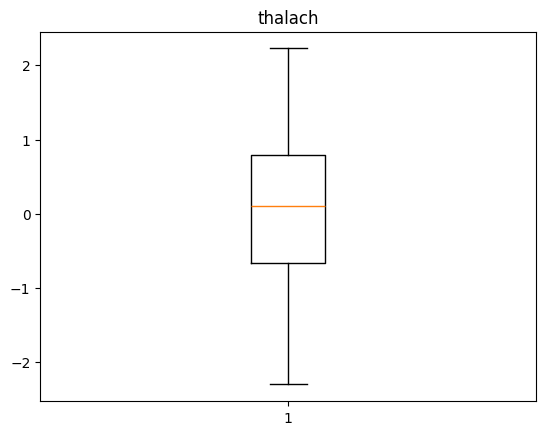

In [9]:
import numpy as np

x_train['trestbps'] = np.where(x_train['trestbps'] > x_train['trestbps'].quantile(0.99), x_train['trestbps'].quantile(0.99), x_train['trestbps'])
x_test['trestbps'] = np.where(x_test['trestbps'] > x_train['trestbps'].quantile(0.99), x_train['trestbps'].quantile(0.99), x_test['trestbps'])

x_train['chol'] = np.where(x_train['chol'] > x_train['chol'].quantile(0.99), x_train['chol'].quantile(0.99), x_train['chol'])
x_test['chol'] = np.where(x_test['chol'] > x_train['chol'].quantile(0.99), x_train['chol'].quantile(0.99), x_test['chol'])

x_train['thalach'] = np.where(x_train['thalach'] < x_train['thalach'].quantile(0.01), x_train['thalach'].quantile(0.01), x_train['thalach'])
x_test['thalach'] = np.where(x_test['thalach'] < x_train['thalach'].quantile(0.01), x_train['thalach'].quantile(0.01), x_test['thalach'])

for i in num_variables:
    plt.hist(x_train[i])
    plt.title(i)
    plt.show()
    plt.boxplot(x_train[i])
    plt.title(i)
    plt.show()


<Axes: >

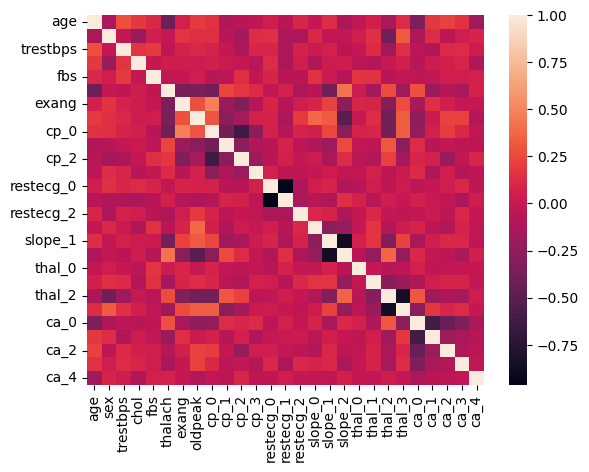

In [10]:
import seaborn as sns

sns.heatmap(x_train.corr())

In [11]:
x_train[['age', 'trestbps', 'chol', 'thalach']].describe()

,age,trestbps,chol,thalach
count,2.120000e+02,212.000000,212.000000,212.000000
mean,-3.561093e-17,-0.003334,-0.014035,0.005861
std,1.002367e+00,0.991689,0.939932,0.986124
min,-2.764820e+00,-2.242759,-2.190544,-2.300895
25%,-7.198890e-01,-0.711281,-0.654256,-0.664011
50%,1.411348e-01,-0.122252,-0.117919,0.109103
75%,7.869026e-01,0.466778,0.486597,0.786902
max,2.401322e+00,2.822898,2.950658,2.227225


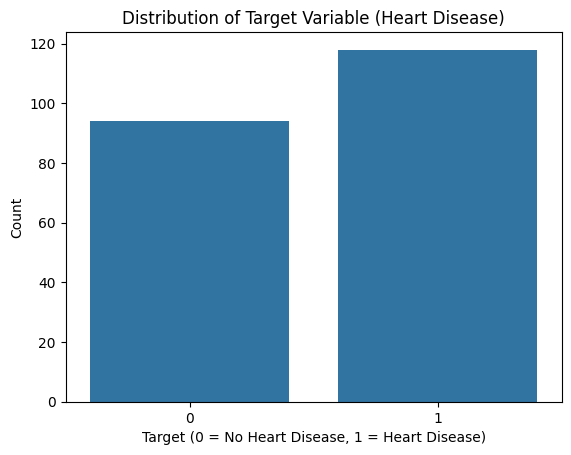

In [12]:
sns.countplot(x=y_train)
plt.title('Distribution of Target Variable (Heart Disease)')
plt.xlabel('Target (0 = No Heart Disease, 1 = Heart Disease)')
plt.ylabel('Count')
plt.show()

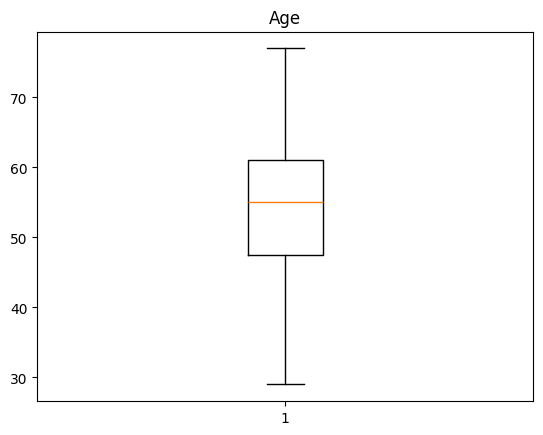

In [13]:
plt.boxplot(data['age'])
plt.title('Age')
plt.show()

In [14]:
x_train['age_range'] = pd.cut(data.loc[x_train.index, 'age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
x_test['age_range'] = pd.cut(data.loc[x_test.index, 'age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

x_train['age_chol'] = x_train['age'] * x_train['chol']
x_test['age_chol'] = x_test['age'] * x_test['chol']

x_train

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,thal_1,thal_2,thal_3,ca_0,ca_1,ca_2,ca_3,ca_4,age_range,age_chol
276,0.356391,1,0.820196,-0.517899,0,-1.881931,0,2.0,True,False,...,False,False,True,False,True,False,False,False,50-60,-0.184574
44,-1.688541,1,0.466778,1.354736,0,1.379976,0,0.0,False,False,...,False,True,False,True,False,False,False,False,30-40,-2.287527
260,1.217414,0,2.705092,-0.336090,1,0.659815,1,1.0,True,False,...,False,False,True,False,False,True,False,False,60-70,-0.409161
74,-1.258029,0,-0.593475,-0.608804,0,0.659815,0,0.2,False,False,...,False,True,False,True,False,False,False,False,40-50,0.765893
133,-1.473285,1,-1.300311,-0.208823,0,0.151466,0,0.0,False,True,...,False,True,False,True,False,False,False,False,40-50,0.307656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,-0.397005,1,-1.889341,-0.445175,0,-0.272159,1,1.2,False,False,...,False,True,False,True,False,False,False,False,50-60,0.176737
131,-0.612261,0,0.113360,0.445690,0,0.532728,0,0.0,False,True,...,False,True,False,True,False,False,False,False,40-50,-0.272879
265,1.217414,1,-1.182505,-0.626985,0,-0.738145,1,0.1,True,False,...,False,True,False,False,True,False,False,False,60-70,-0.763300
122,-1.473285,0,-1.182505,0.391147,0,0.956352,1,0.0,False,False,...,False,True,False,True,False,False,False,False,40-50,-0.576271


In [15]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

x_train['age_range'] = label.fit_transform(x_train['age_range'])
x_test['age_range'] = label.transform(x_test['age_range'])


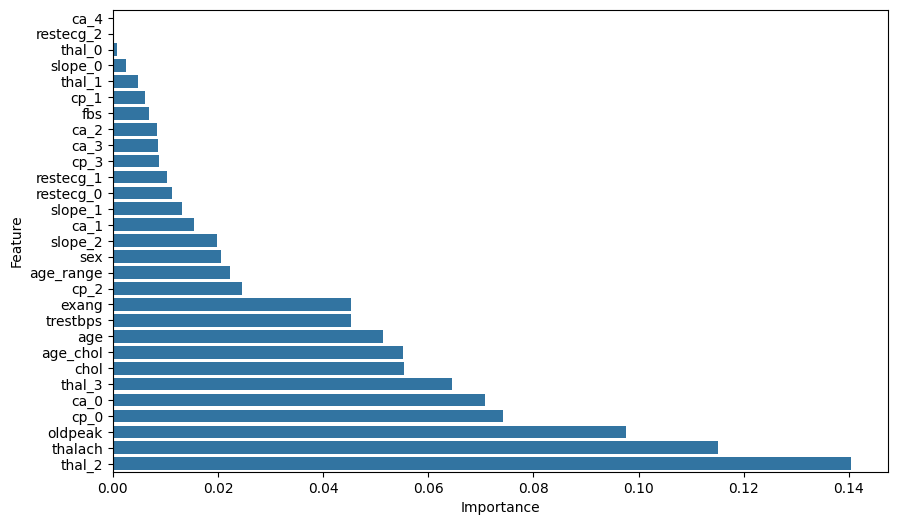

In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance')

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.show()

In [17]:
threshold = 0.03

important_features = importance[importance['Importance'] > threshold]['Feature'].tolist()

x_train = x_train[important_features]
x_test = x_test[important_features]

print("Selected features:", important_features)

x_train

Selected features: ['exang', 'trestbps', 'age', 'age_chol', 'chol', 'thal_3', 'ca_0', 'cp_0', 'oldpeak', 'thalach', 'thal_2']


,exang,trestbps,age,age_chol,chol,thal_3,ca_0,cp_0,oldpeak,thalach,thal_2
276,0,0.820196,0.356391,-0.184574,-0.517899,True,False,True,2.0,-1.881931,False
44,0,0.466778,-1.688541,-2.287527,1.354736,False,True,False,0.0,1.379976,True
260,1,2.705092,1.217414,-0.409161,-0.336090,True,False,True,1.0,0.659815,False
74,0,-0.593475,-1.258029,0.765893,-0.608804,False,True,False,0.2,0.659815,True
133,0,-1.300311,-1.473285,0.307656,-0.208823,False,True,False,0.0,0.151466,True
...,...,...,...,...,...,...,...,...,...,...,...
66,1,-1.889341,-0.397005,0.176737,-0.445175,False,True,False,1.2,-0.272159,True
131,0,0.113360,-0.612261,-0.272879,0.445690,False,True,False,0.0,0.532728,True
265,1,-1.182505,1.217414,-0.763300,-0.626985,False,False,True,0.1,-0.738145,True
122,1,-1.182505,-1.473285,-0.576271,0.391147,False,True,False,0.0,0.956352,True


Logistic Regression Results:
Accuracy: 0.7692307692307693
Precision: 0.7321428571428571
Recall: 0.8723404255319149
F1 Score: 0.7961165048543689
AUC Score: 0.8433268858800773
K-fold cross vaditation accuracy: [0.90697674 0.86046512 0.9047619  0.78571429 0.88095238]
K-fold cross vaditation mean accuracy: 0.8677740863787374


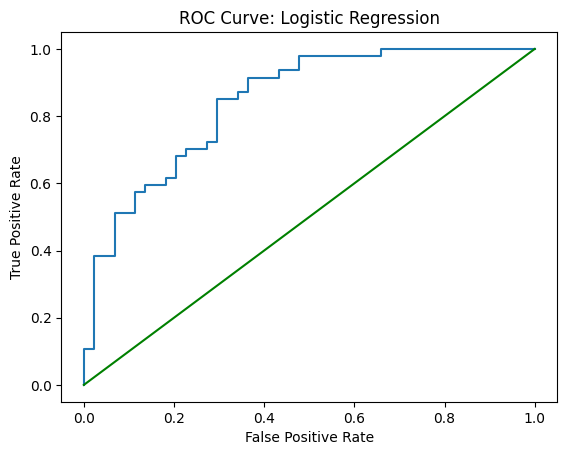

Decision Tree Classifier Results:
Accuracy: 0.6703296703296703
Precision: 0.6545454545454545
Recall: 0.7659574468085106
F1 Score: 0.7058823529411765
AUC Score: 0.6670696324951644
K-fold cross vaditation accuracy: [0.81395349 0.62790698 0.78571429 0.5952381  0.85714286]
K-fold cross vaditation mean accuracy: 0.7359911406423034


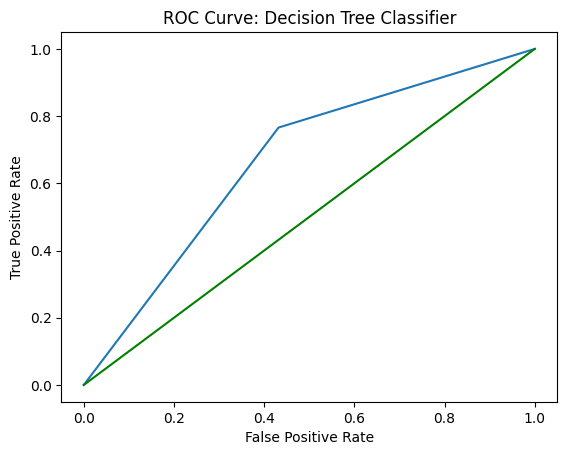

Random Forest Classifier Results:
Accuracy: 0.7582417582417582
Precision: 0.7192982456140351
Recall: 0.8723404255319149
F1 Score: 0.7884615384615384
AUC Score: 0.8215667311411993
K-fold cross vaditation accuracy: [0.88372093 0.81395349 0.9047619  0.76190476 0.88095238]
K-fold cross vaditation mean accuracy: 0.8490586932447396


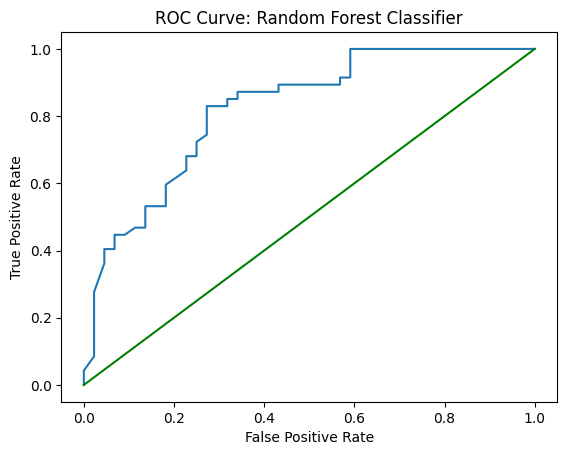

SVC Results:
Accuracy: 0.7582417582417582
Precision: 0.7192982456140351
Recall: 0.8723404255319149
F1 Score: 0.7884615384615384
AUC Score: 0.8317214700193423
K-fold cross vaditation accuracy: [0.86046512 0.79069767 0.9047619  0.80952381 0.83333333]
K-fold cross vaditation mean accuracy: 0.8397563676633443


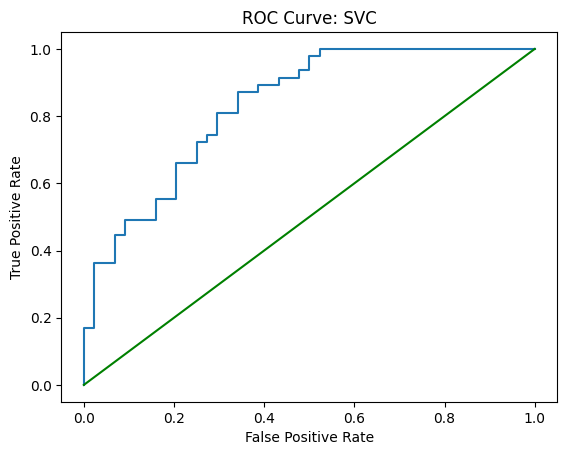

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import cross_val_score

lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)
lg_model_predict = lg_model.predict(x_test)
lg_model_probs = lg_model.predict_proba(x_test)[:, 1]
lg_cross_valid = cross_val_score(lg_model, x_train, y_train, cv=5)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, lg_model_predict):}")
print(f"Precision: {precision_score(y_test, lg_model_predict):}")
print(f"Recall: {recall_score(y_test, lg_model_predict):}")
print(f"F1 Score: {f1_score(y_test, lg_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, lg_model_probs)}")
print(f"K-fold cross vaditation accuracy: {lg_cross_valid}")
print(f"K-fold cross vaditation mean accuracy: {lg_cross_valid.mean()}")

lg_fpr, lg_tpr, _ = roc_curve(y_test, lg_model_probs)
plt.plot(lg_fpr, lg_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train, y_train)
dtc_model_predict = dtc_model.predict(x_test)
dtc_model_probs = dtc_model.predict_proba(x_test)[:, 1]
dtc_cross_valid = cross_val_score(dtc_model, x_train, y_train, cv=5)

print("Decision Tree Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, dtc_model_predict):}")
print(f"Precision: {precision_score(y_test, dtc_model_predict):}")
print(f"Recall: {recall_score(y_test, dtc_model_predict):}")
print(f"F1 Score: {f1_score(y_test, dtc_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, dtc_model_probs)}")
print(f"K-fold cross vaditation accuracy: {dtc_cross_valid}")
print(f"K-fold cross vaditation mean accuracy: {dtc_cross_valid.mean()}")

dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_model_probs)
plt.plot(dtc_fpr, dtc_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: Decision Tree Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)
rfc_model_predict = rfc_model.predict(x_test)
rfc_model_probs = rfc_model.predict_proba(x_test)[:, 1]
rfc_cross_valid = cross_val_score(rfc_model, x_train, y_train, cv=5)

print("Random Forest Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, rfc_model_predict):}")
print(f"Precision: {precision_score(y_test, rfc_model_predict):}")
print(f"Recall: {recall_score(y_test, rfc_model_predict):}")
print(f"F1 Score: {f1_score(y_test, rfc_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, rfc_model_probs)}")
print(f"K-fold cross vaditation accuracy: {rfc_cross_valid}")
print(f"K-fold cross vaditation mean accuracy: {rfc_cross_valid.mean()}")

rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_model_probs)
plt.plot(rfc_fpr, rfc_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: Random Forest Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


svc_model = SVC(probability=True)
svc_model.fit(x_train, y_train)
svc_model_predict = svc_model.predict(x_test)
svc_model_probs = svc_model.predict_proba(x_test)[:, 1]
svc_cross_valid = cross_val_score(svc_model, x_train, y_train, cv=5)

print("SVC Results:")
print(f"Accuracy: {accuracy_score(y_test, svc_model_predict):}")
print(f"Precision: {precision_score(y_test, svc_model_predict):}")
print(f"Recall: {recall_score(y_test, svc_model_predict):}")
print(f"F1 Score: {f1_score(y_test, svc_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, svc_model_probs)}")
print(f"K-fold cross vaditation accuracy: {svc_cross_valid}")
print(f"K-fold cross vaditation mean accuracy: {svc_cross_valid.mean()}")

svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_model_probs)
plt.plot(svc_fpr, svc_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: SVC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Logistic Regression Results:
Best Parameters: {'C': 10, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.7582417582417582
Precision: 0.7272727272727273
Recall: 0.851063829787234
F1 Score: 0.7843137254901961
AUC Score: 0.8380077369439072
K-fold cross validation accuracy: [0.90697674 0.8372093  0.9047619  0.83333333 0.9047619 ]
K-fold cross validation mean accuracy: 0.8774086378737541


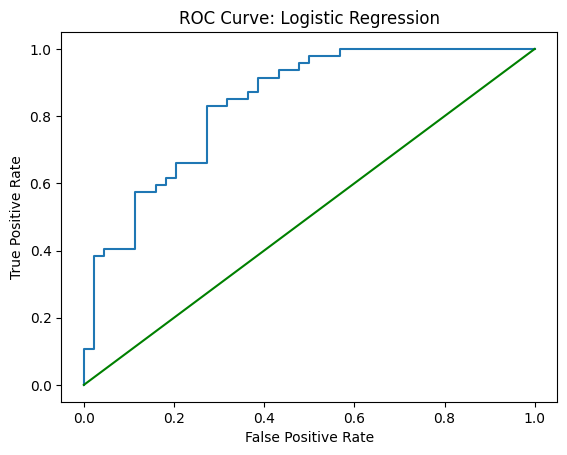

Decision Tree Classifier Results:
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy: 0.7032967032967034
Precision: 0.6785714285714286
Recall: 0.8085106382978723
F1 Score: 0.7378640776699029
AUC Score: 0.754835589941973
K-fold cross validation accuracy: [0.81395349 0.74418605 0.9047619  0.66666667 0.83333333]
K-fold cross validation mean accuracy: 0.7925802879291252


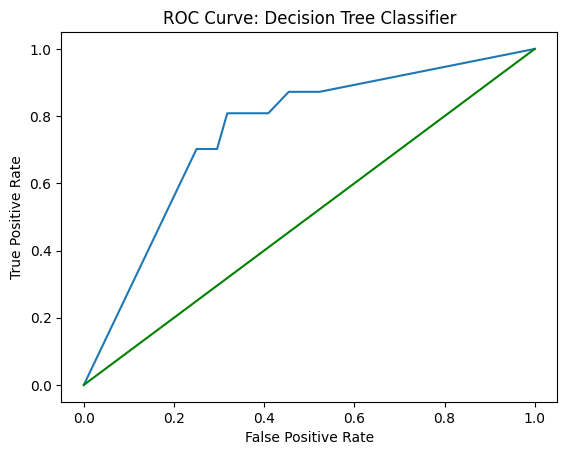

Random Forest Classifier Results:
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.7802197802197802
Precision: 0.7454545454545455
Recall: 0.8723404255319149
F1 Score: 0.803921568627451
AUC Score: 0.8486460348162477
K-fold cross validation accuracy: [0.86046512 0.8372093  0.9047619  0.83333333 0.9047619 ]
K-fold cross validation mean accuracy: 0.8681063122923588


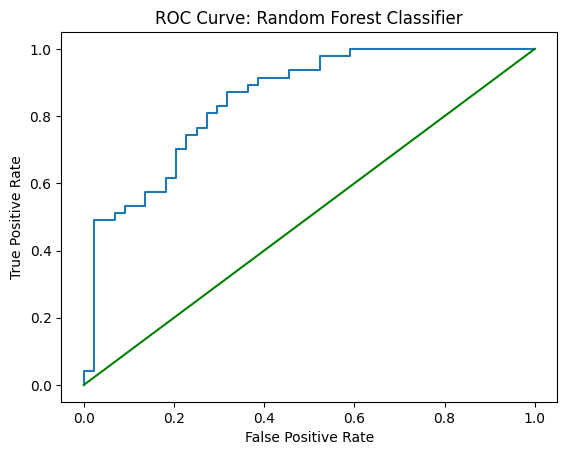

SVC Results:
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.7692307692307693
Precision: 0.7321428571428571
Recall: 0.8723404255319149
F1 Score: 0.7961165048543689
AUC Score: 0.8447775628626693
K-fold cross validation accuracy: [0.93023256 0.8372093  0.9047619  0.83333333 0.9047619 ]
K-fold cross validation mean accuracy: 0.8820598006644518


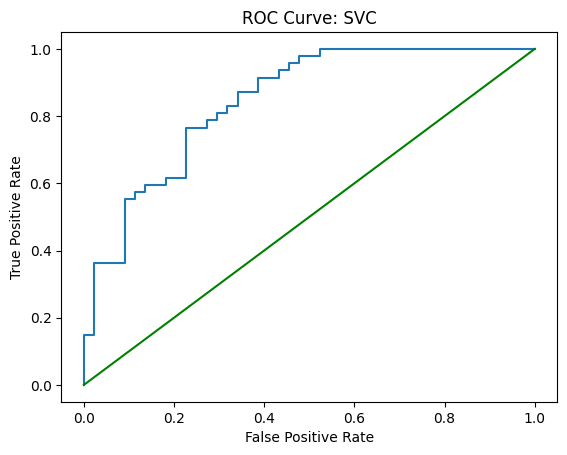

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],      
    'max_iter': [500, 1000],
    'class_weight': ['balanced']
}

grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='roc_auc')
grid_search_lr.fit(x_train, y_train)
best_model_lr = grid_search_lr.best_estimator_

print("Logistic Regression Results:")
print("Best Parameters:", grid_search_lr.best_params_)

lr_model_predict = best_model_lr.predict(x_test)
lr_model_probs = best_model_lr.predict_proba(x_test)[:, 1]
lr_cross_valid = cross_val_score(best_model_lr, x_train, y_train, cv=5)

print(f"Accuracy: {accuracy_score(y_test, lr_model_predict):}")
print(f"Precision: {precision_score(y_test, lr_model_predict):}")
print(f"Recall: {recall_score(y_test, lr_model_predict):}")
print(f"F1 Score: {f1_score(y_test, lr_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, lr_model_probs)}")
print(f"K-fold cross validation accuracy: {lr_cross_valid}")
print(f"K-fold cross validation mean accuracy: {lr_cross_valid.mean()}")

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_model_probs)
plt.plot(lr_fpr, lr_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

param_grid_dtc = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dtc = GridSearchCV(DecisionTreeClassifier(), param_grid_dtc, cv=5, scoring='roc_auc')
grid_search_dtc.fit(x_train, y_train)
best_model_dtc = grid_search_dtc.best_estimator_

print("Decision Tree Classifier Results:")
print("Best Parameters:", grid_search_dtc.best_params_)

dtc_model_predict = best_model_dtc.predict(x_test)
dtc_model_probs = best_model_dtc.predict_proba(x_test)[:, 1]
dtc_cross_valid = cross_val_score(best_model_dtc, x_train, y_train, cv=5)

print(f"Accuracy: {accuracy_score(y_test, dtc_model_predict):}")
print(f"Precision: {precision_score(y_test, dtc_model_predict):}")
print(f"Recall: {recall_score(y_test, dtc_model_predict):}")
print(f"F1 Score: {f1_score(y_test, dtc_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, dtc_model_probs)}")
print(f"K-fold cross validation accuracy: {dtc_cross_valid}")
print(f"K-fold cross validation mean accuracy: {dtc_cross_valid.mean()}")

dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_model_probs)
plt.plot(dtc_fpr, dtc_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: Decision Tree Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

param_grid_rfc = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rfc = GridSearchCV(RandomForestClassifier(), param_grid_rfc, cv=5, scoring='roc_auc')
grid_search_rfc.fit(x_train, y_train)
best_model_rfc = grid_search_rfc.best_estimator_

print("Random Forest Classifier Results:")
print("Best Parameters:", grid_search_rfc.best_params_)

rfc_model_predict = best_model_rfc.predict(x_test)
rfc_model_probs = best_model_rfc.predict_proba(x_test)[:, 1]
rfc_cross_valid = cross_val_score(best_model_rfc, x_train, y_train, cv=5)

print(f"Accuracy: {accuracy_score(y_test, rfc_model_predict):}")
print(f"Precision: {precision_score(y_test, rfc_model_predict):}")
print(f"Recall: {recall_score(y_test, rfc_model_predict):}")
print(f"F1 Score: {f1_score(y_test, rfc_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, rfc_model_probs)}")
print(f"K-fold cross validation accuracy: {rfc_cross_valid}")
print(f"K-fold cross validation mean accuracy: {rfc_cross_valid.mean()}")

rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_model_probs)
plt.plot(rfc_fpr, rfc_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: Random Forest Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search_svc = GridSearchCV(SVC(probability=True), param_grid_svc, cv=5, scoring='roc_auc')
grid_search_svc.fit(x_train, y_train)
best_model_svc = grid_search_svc.best_estimator_

print("SVC Results:")
print("Best Parameters:", grid_search_svc.best_params_)

svc_model_predict = best_model_svc.predict(x_test)
svc_model_probs = best_model_svc.predict_proba(x_test)[:, 1]
svc_cross_valid = cross_val_score(best_model_svc, x_train, y_train, cv=5)

print(f"Accuracy: {accuracy_score(y_test, svc_model_predict):}")
print(f"Precision: {precision_score(y_test, svc_model_predict):}")
print(f"Recall: {recall_score(y_test, svc_model_predict):}")
print(f"F1 Score: {f1_score(y_test, svc_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, svc_model_probs)}")
print(f"K-fold cross validation accuracy: {svc_cross_valid}")
print(f"K-fold cross validation mean accuracy: {svc_cross_valid.mean()}")

svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_model_probs)
plt.plot(svc_fpr, svc_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: SVC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()